In [1]:
!pip install pulp

     |████████████████████████████████| 41.2 MB 3.6 MB/s eta 0:00:01


In [4]:
from pulp import *
from fractions import Fraction

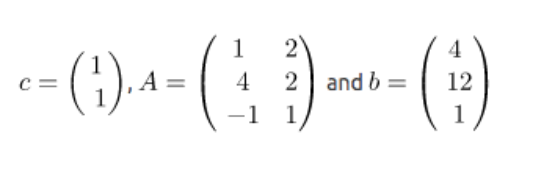

# Maximum Problem

In [23]:
# Maximum problem
prob = LpProblem("example of standard maximum problem",LpMaximize)

# nonnegativity constrints
x1 = LpVariable("x1",0)
x2 = LpVariable("x2",0)

# objective function
prob += x1+x2, "maximum value of x1 = x2"

# main constraints
prob += x1+2*x2 <=4, "constraint 1"
prob += 4*x1 + 2*x2 <=12, "constraint 2"
prob += -x1 + x2 <=1, "constraint 3"

# the problem is solved using pulp's choice of solver
prob.solve()

#status of the solution
print(f"status: {LpStatus[prob.status]}")

print("All variables:")
for v in prob.variables():
    print(v.name, "=", v.varValue) # # variable & value

# maximum value of the objective function
print(f"max (x1 + x2) = {str(Fraction(value(prob.objective)).limit_denominator())}")

status: Optimal
All variables:
x1 = 2.6666667
x2 = 0.66666667
max (x1 + x2) = 10/3


# Minimum Problem  
- multiplying the objective function by -1
- multiplying the constraint inequality by -1 and reversing the inequalities

In [26]:
# Minimum problem
prob = LpProblem("example of standard maximum problem",LpMinimize)

# nonnegativity constrints
x1 = LpVariable("x1",0)
x2 = LpVariable("x2",0)

# objective function
prob += -x1 -x2, "minimum value of -x1 -x2"

# main constraints :*-1 & reversing
prob += -x1 -2*x2 >= -4, "constraint 1"
prob += -4*x1 - 2*x2 >= -12, "constraint 2"
prob += x1 - x2 >= -1, "constraint 3"

# the problem is solved using pulp's choice of solver
prob.solve()

#status of the solution
print(f"status: {LpStatus[prob.status]}")

print("All variables:")
for v in prob.variables():
    print(v.name, "=", v.varValue) # # variable & value

# maximum value of the objective function
print(f"min (-x1 - x2) = {str(Fraction(value(prob.objective)).limit_denominator())}")

status: Optimal
All variables:
x1 = 2.6666667
x2 = 0.66666667
min (-x1 - x2) = -10/3


# References

fractions https://stackoverflow.com/questions/13437589/how-is-pythons-fractions-limit-denominator-implemented

Access the value of a variable in puLP
https://or.stackexchange.com/questions/742/how-do-i-access-the-value-of-a-variable-in-pulp